<b>This Jupyter notebook performs calculations described and used in Sections 3 and 4.3 of JWST Technical report "OTE Science Performance Memo 7: The Optimal Wavefront Control Threshold" (van der Marel, 2025, in preparation). To setup a conda environment for running this notebook, see e.g., Appendix A of <A HREF="https://www.stsci.edu/files/live/sites/www/files/home/jwst/documentation/technical-documents/_documents/JWST-STScI-009059.pdf">"OTE Science Performance Memo 5: The Optimal Wavefront Sensing Cadence" (van der Marel, 2025)<A></b>

## Import Packages

In [1]:
# Import packages

import webbpsf
import poppy
import os
import numpy as np
import matplotlib.pylab as plt
import csv
import math

from astropy.table import Table, vstack

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-068 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-071
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


## Define Functions

In [2]:
# Define a function for getting the encircled energy for a list of radii

def get_encircled_energy(psf_hdu, radii):
    """
    Calculates the encircled energy for given radii using poppy.

    Parameters:
    psf_hdu (astropy.io.fits.HDUList): The PSF object returned by stpsf.calc_psf().
    radii (float or 1D ndarray): The radii in arcseconds at which to calculate EE.

    Returns:
    ndarray: The encircled energy at each radius.
    """
    # measure_ee returns a function that interpolates the EE curve
    ee_interp = poppy.measure_ee(psf_hdu)
    
    # Call the interpolator function with the desired radii
    encircled_energies = ee_interp(radii)
    
    return encircled_energies

In [3]:
# Define a function for calculating the encircled energy for a given OPD file

def get_EE_rvdm(opd_fn,Ropt):
    nrc.load_wss_opd(opd_fn, output_path=output_path)
    fov_pixels = 511
    psf = nrc.calc_psf(oversample=4, fov_pixels=fov_pixels)
    fwhm_value = webbpsf.measure_fwhm(psf)
    desired_radii = np.array([Ropt])
    ee_values = get_encircled_energy(psf, desired_radii)
    return psf, fwhm_value, ee_values[0]

In [4]:
# define a function for reading a column from a csv file

def read_column_from_csv(filename, column_name):
    """
    Reads a specific column from a CSV file and returns it as a list.

    Args:
        filename (str): The path to the CSV file.
        column_name (str): The header name of the column to read.

    Returns:
        list: A list containing the data from the specified column.
    """
    column_data = []
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if column_name in row:
                column_data.append(row[column_name])
            else:
                print(f"Warning: Column '{column_name}' not found in a row.")
    return column_data

## Set Variables

In [5]:
# Files containing such information as the JWST pupil shape, instrument throughputs, and aperture positions are distributed separately from STPSF.
# To run STPSF, you must download these files and tell STPSF where to find them using the STPSF_PATH environment variable.

# Set environmental variables
# os.environ["WEBBPSF_PATH"] = "./data/webbpsf-data"

In [6]:
# Set output path to current working directory
output_path = os.getcwd()

## Download OPDs and extract RMS WFE

/Users/marel/anaconda3/envs/TelTools/lib/python3.12/site-packages/webbpsf/utils.py:241: UserWarning: Environment variable $WEBBPSF_PATH is not set!

 ***********  ERROR  ******  ERROR  ******  ERROR  ******  ERROR  ***********
 *                                                                          *
 *  WebbPSF requires several data files to operate.                         *
 *  These files could not be located automatically at this time, or this    *
 *  version of the software requires a newer set of reference files than    *
 *  you have installed.  For more details see:                              *
 *                                                                          *
 *        https://webbpsf.readthedocs.io/en/stable/installation.html        *
 *                                                                          *
 *  under "Installing the Required Data Files".                             *
 *  WebbPSF will not be able to function properly until the appropriate

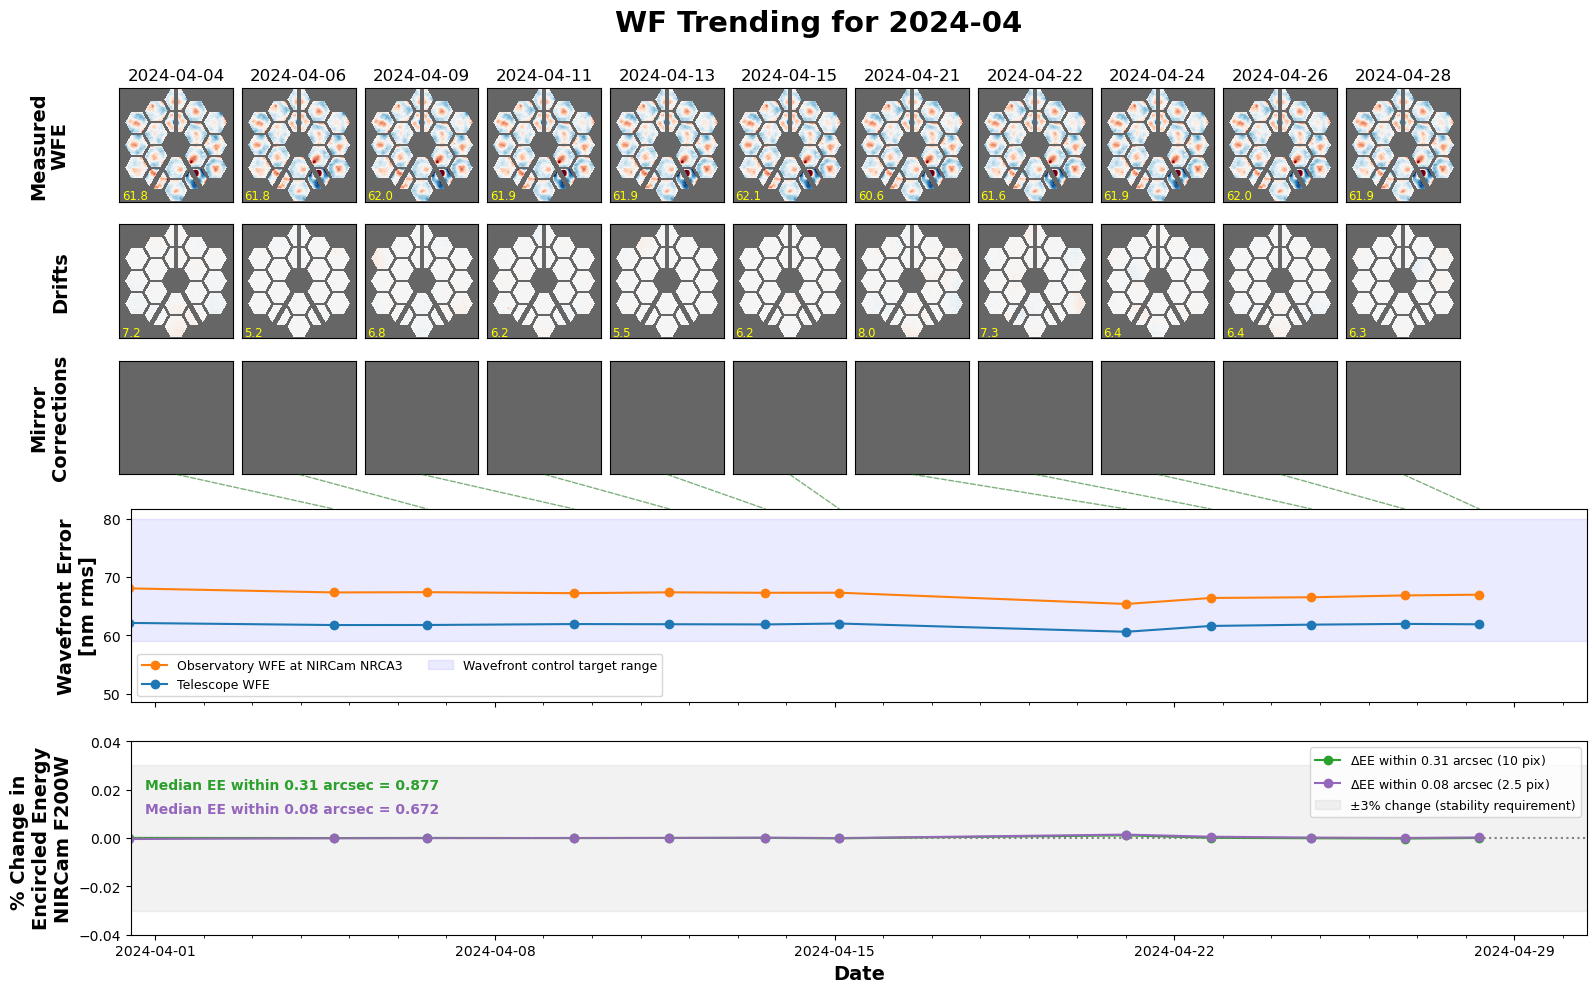

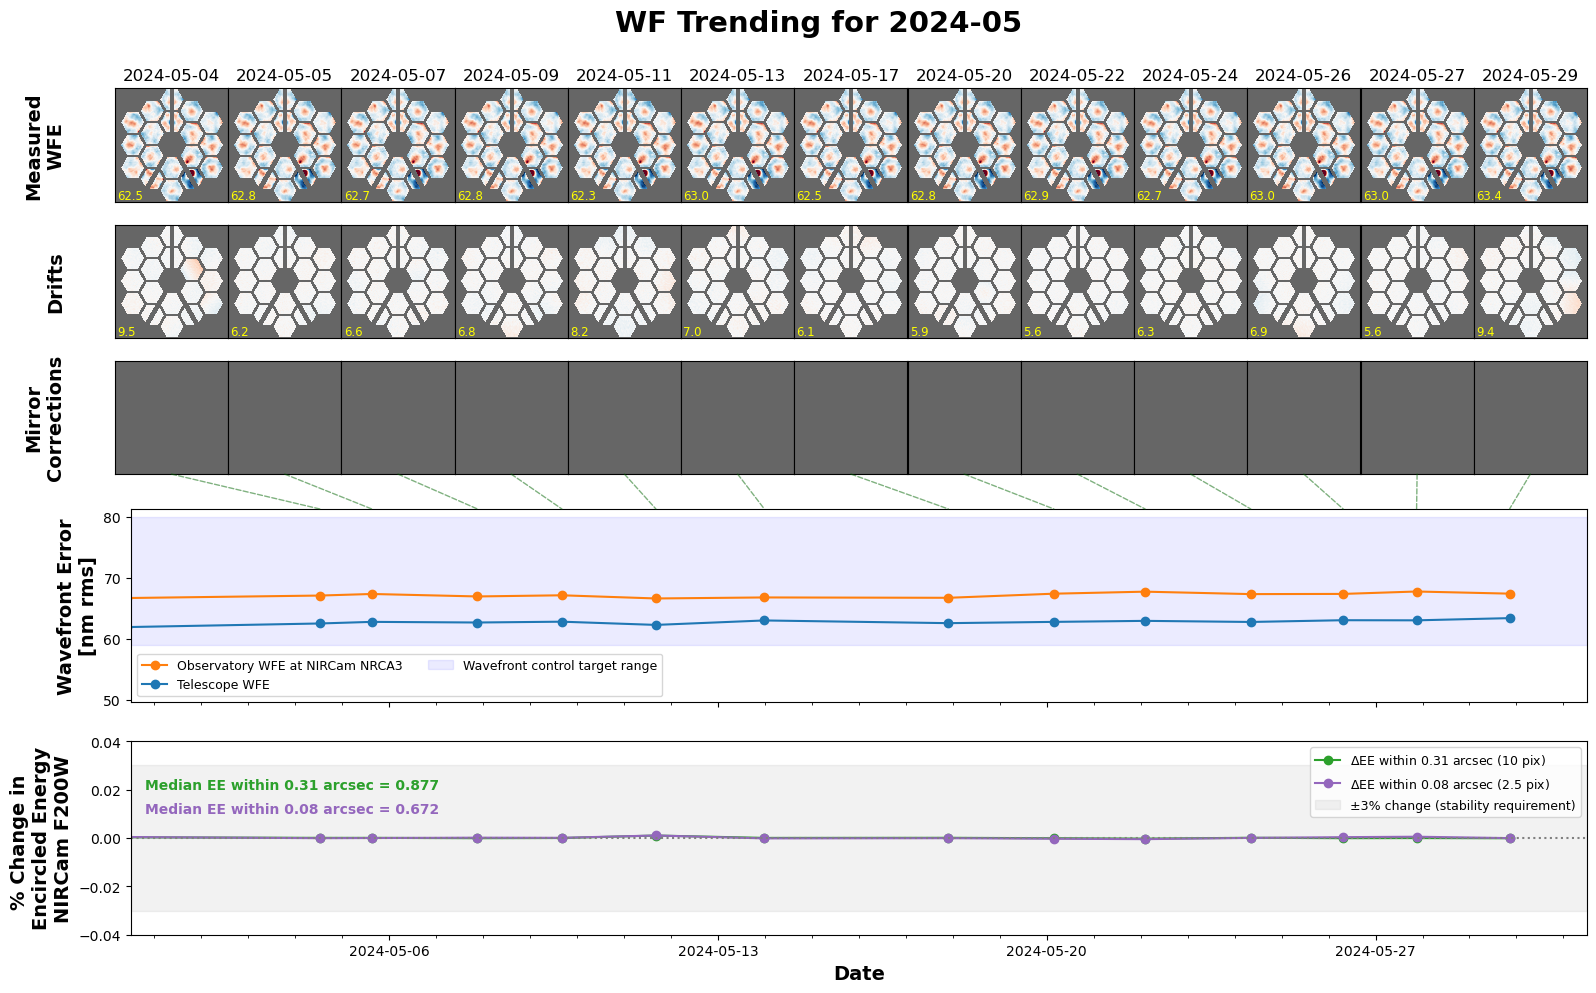

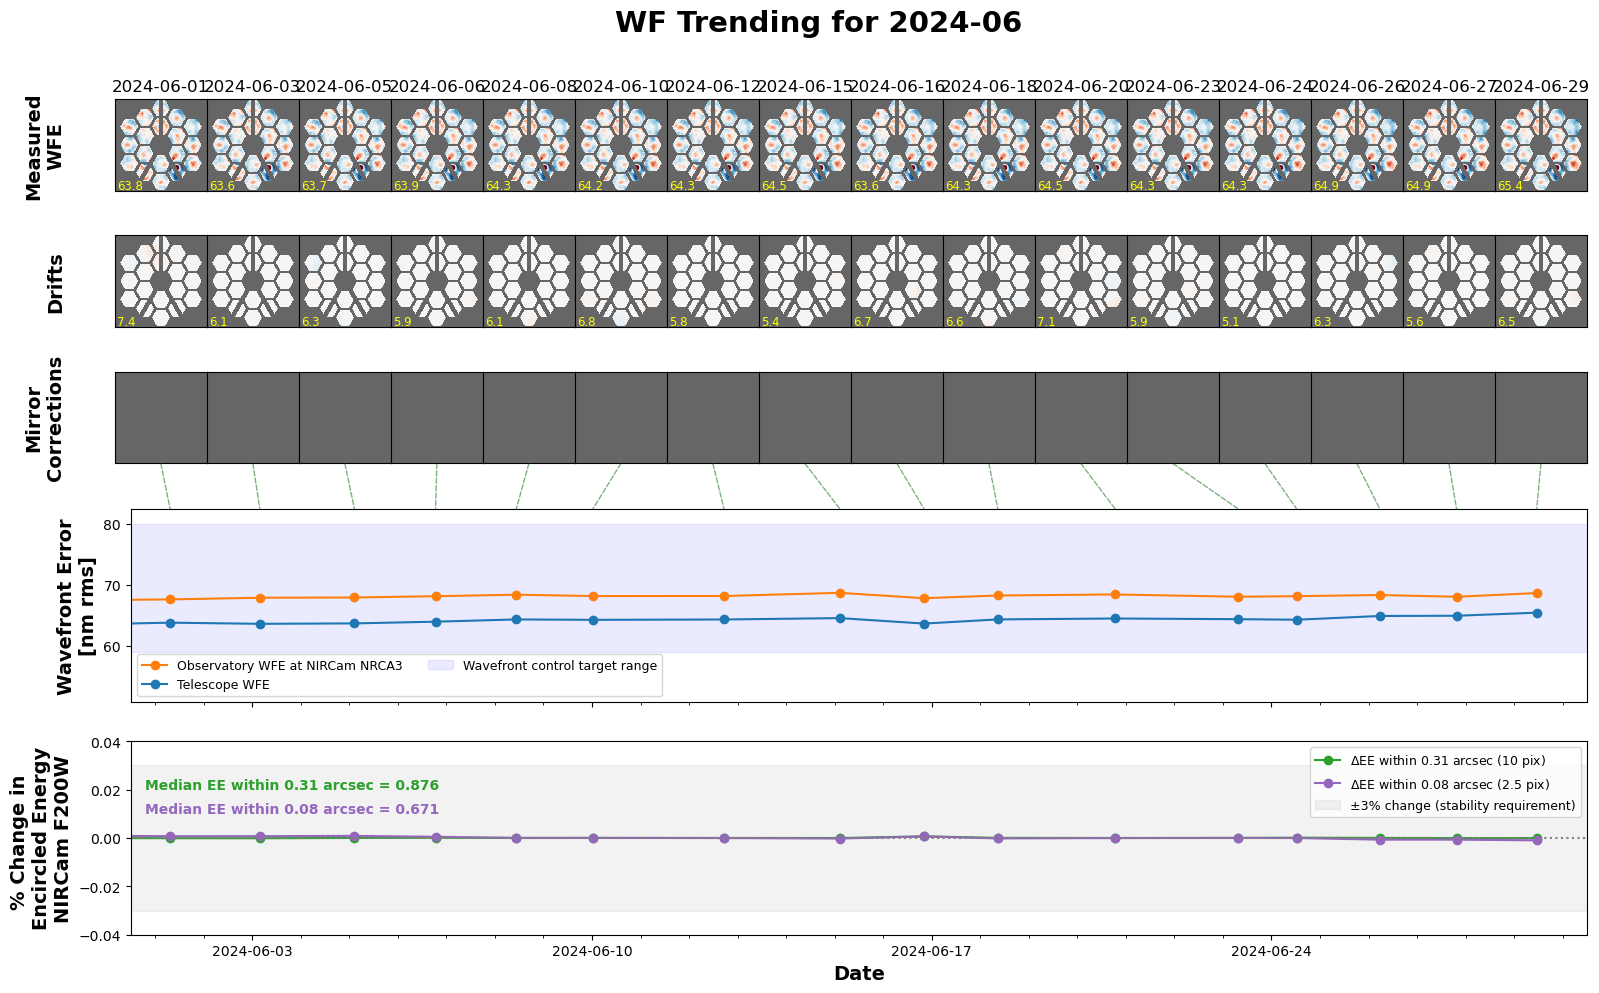

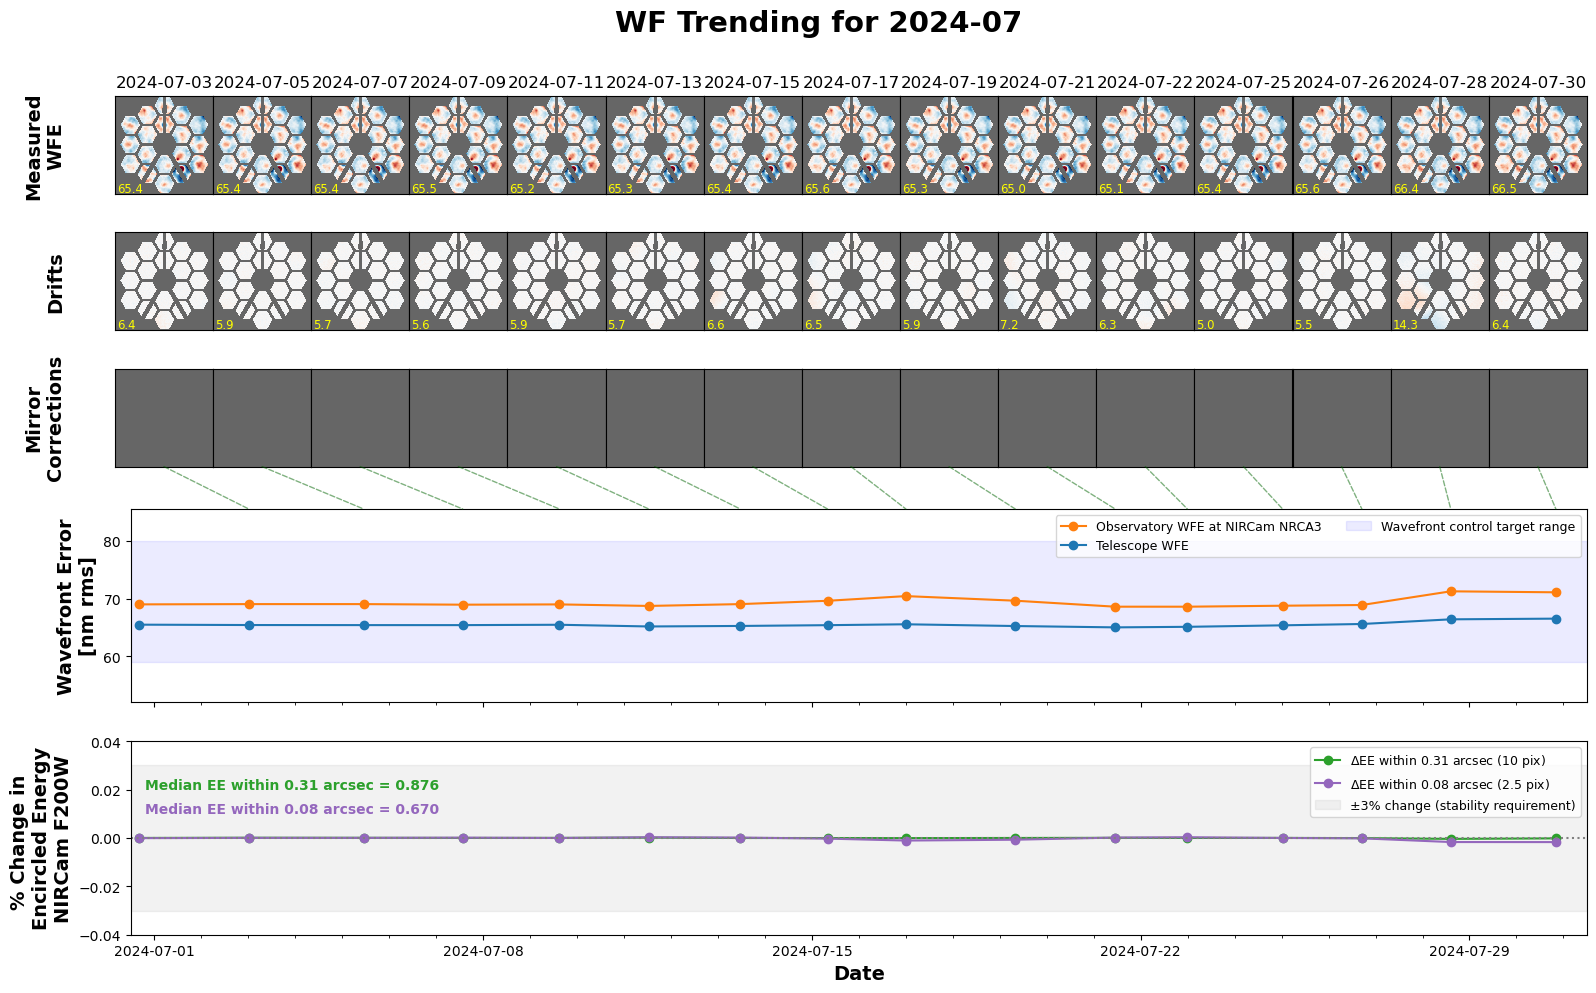

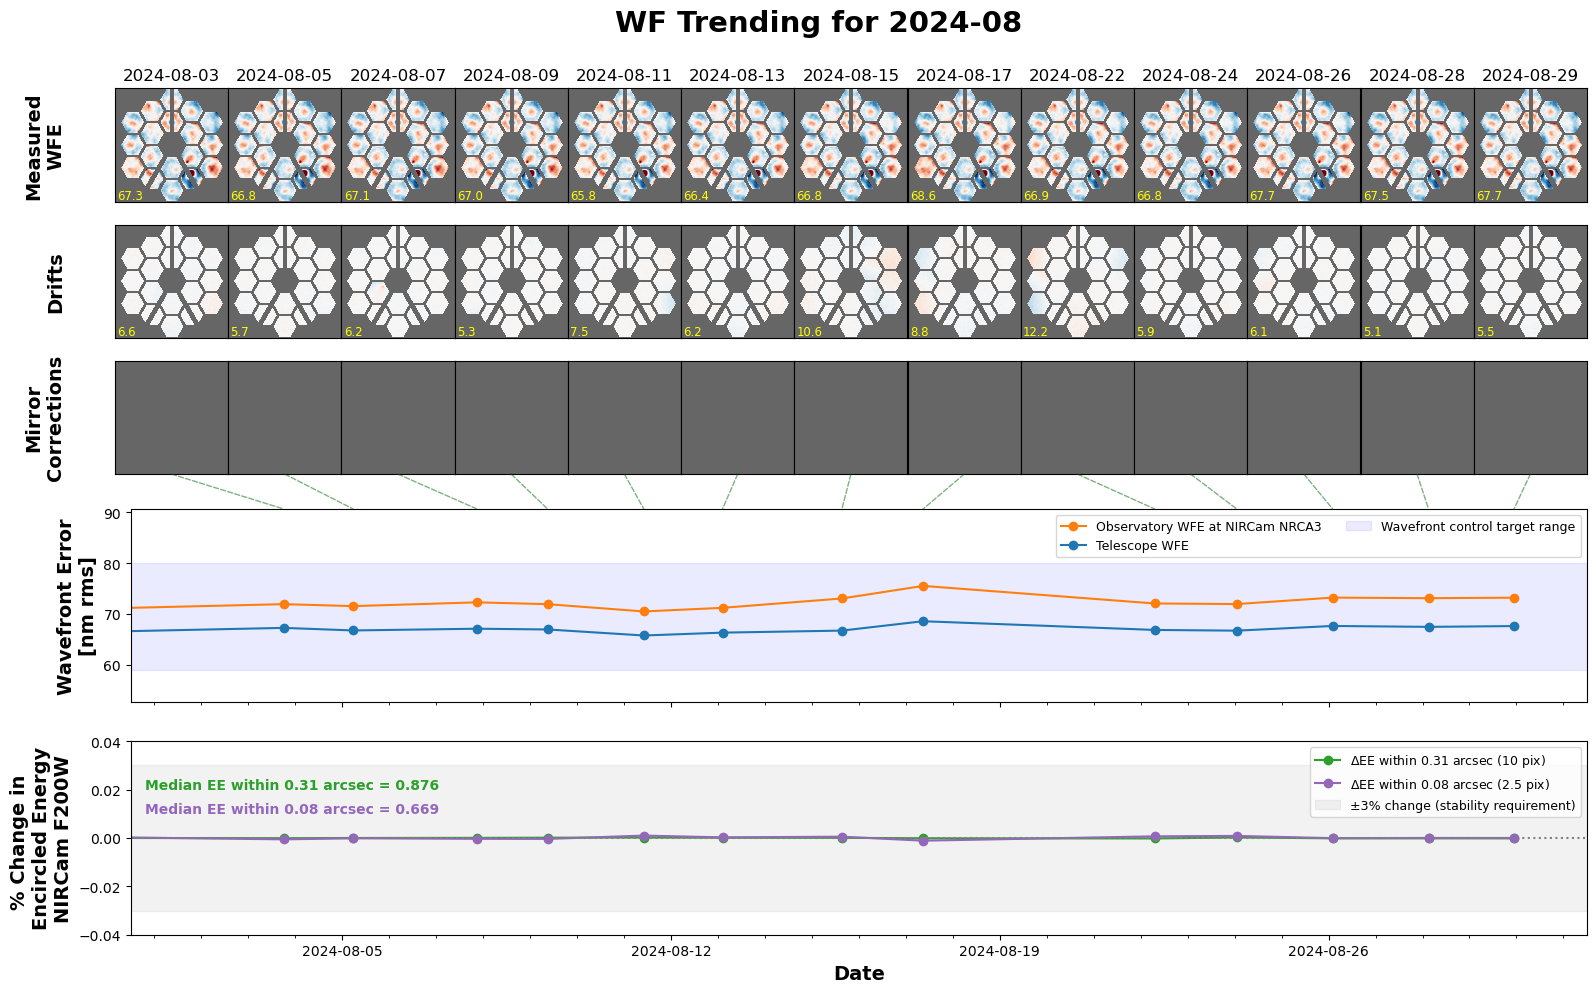

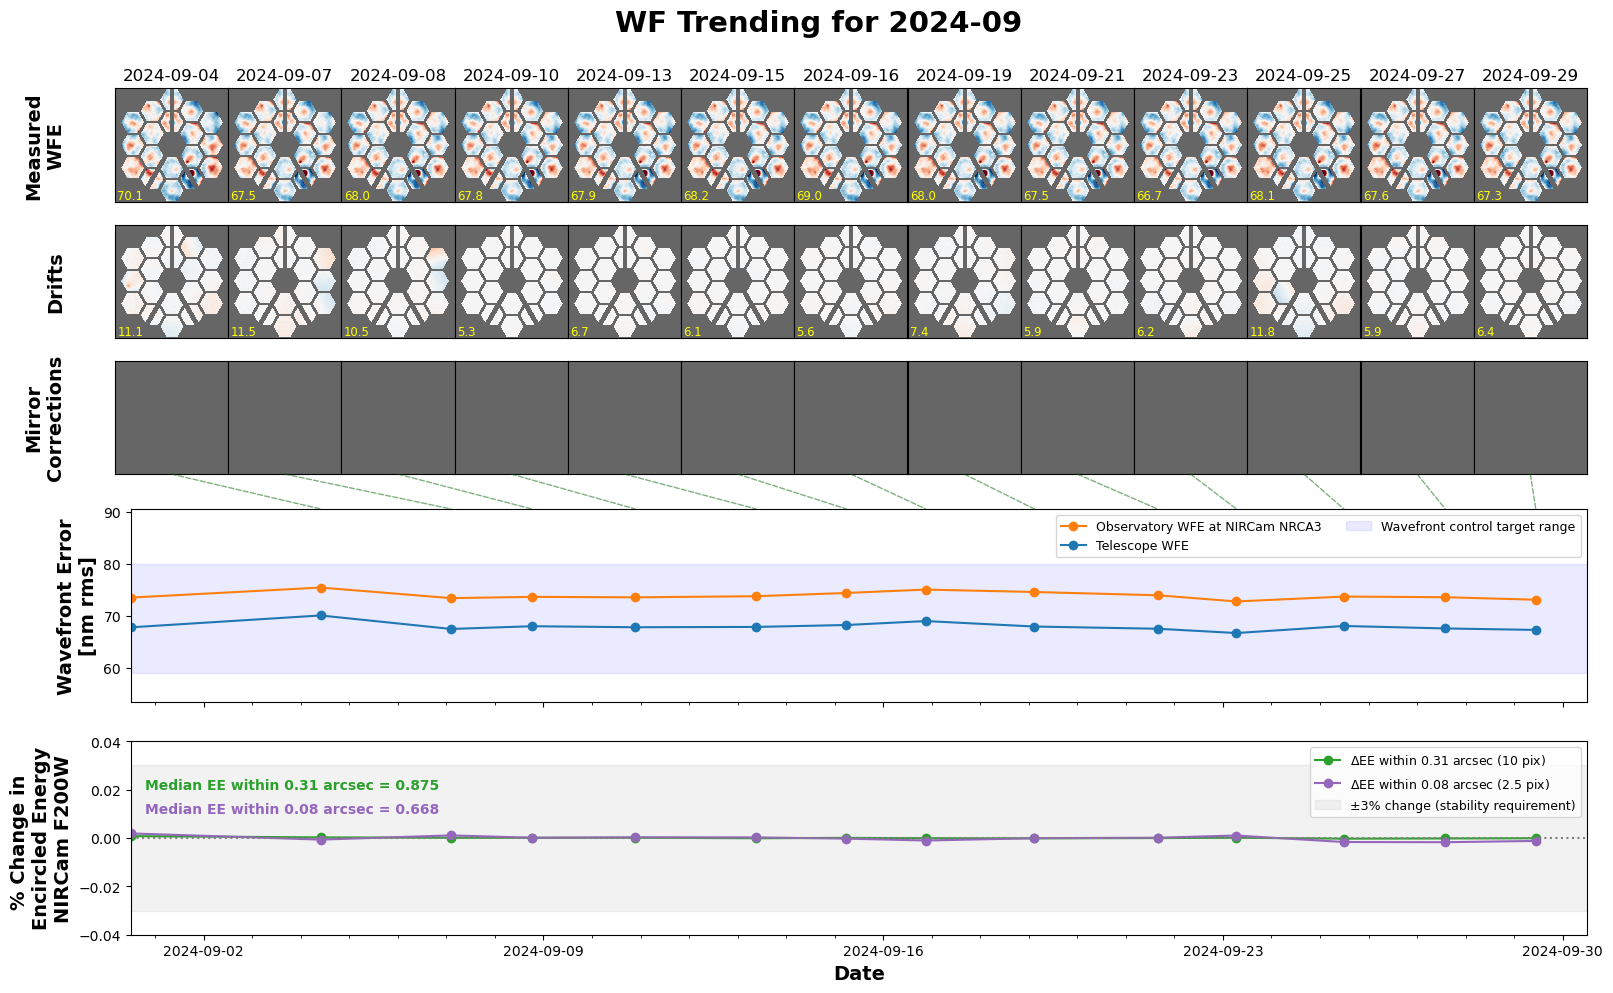

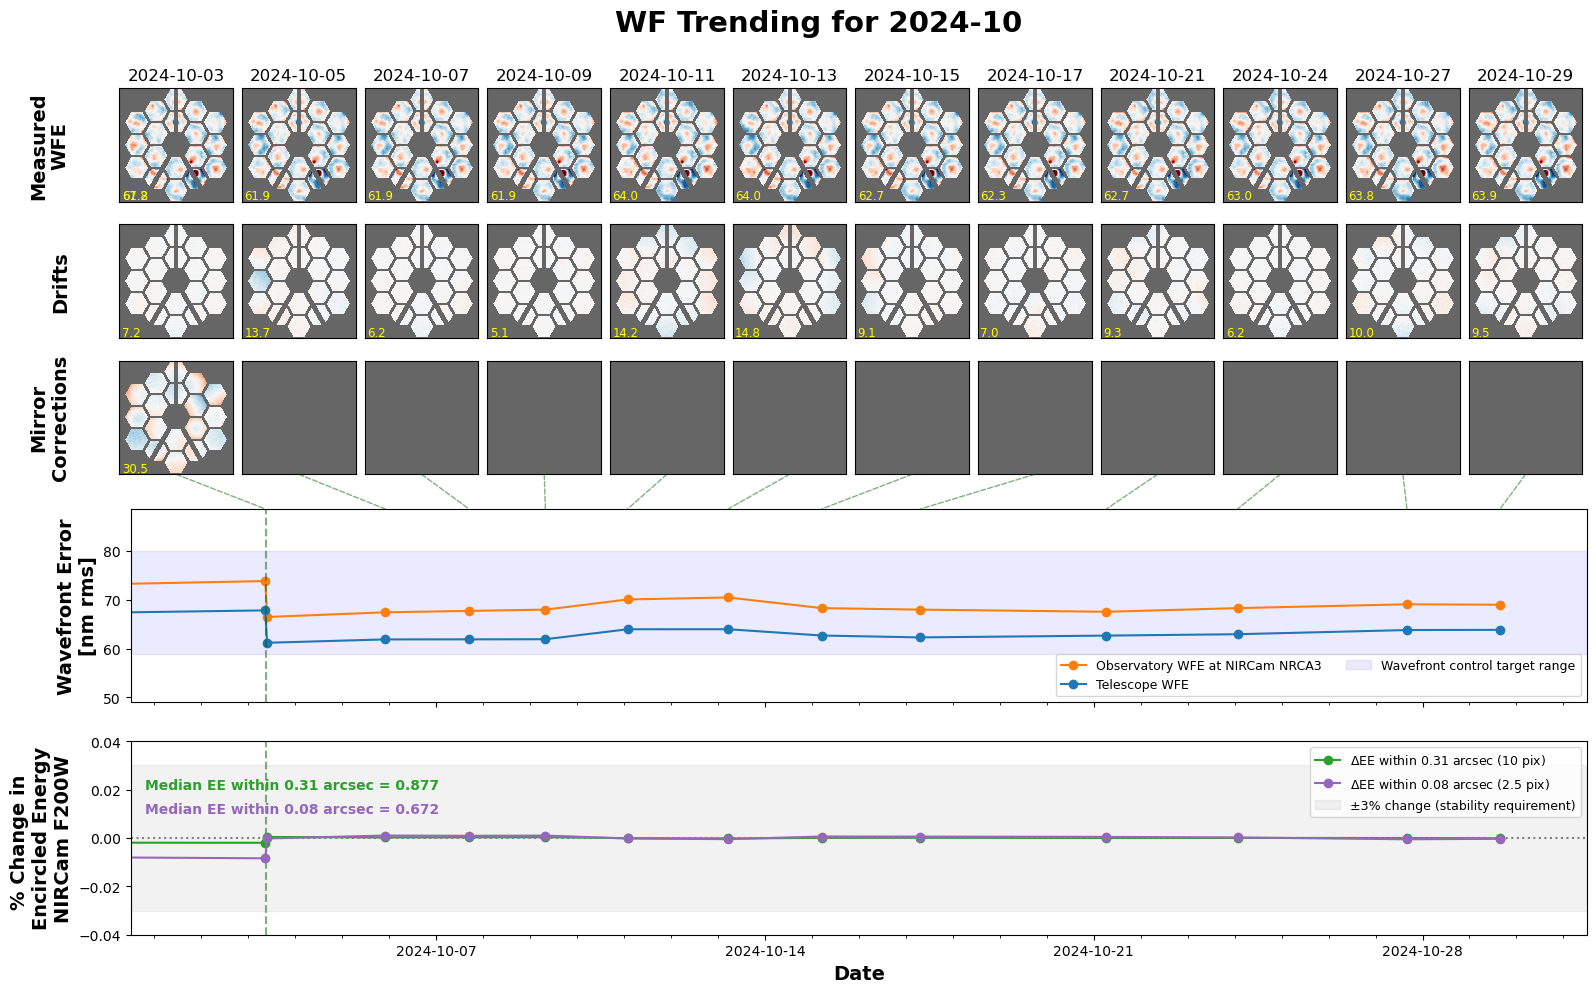

In [7]:
# Download the OPD files for the months of interest, and show the trend_table in each case

trend_table4 = webbpsf.trending.monthly_trending_plot(2024, 4, verbose=False)
trend_table5 = webbpsf.trending.monthly_trending_plot(2024, 5, verbose=False)
trend_table6 = webbpsf.trending.monthly_trending_plot(2024, 6, verbose=False)
trend_table7 = webbpsf.trending.monthly_trending_plot(2024, 7, verbose=False)
trend_table8 = webbpsf.trending.monthly_trending_plot(2024, 8, verbose=False)
trend_table9 = webbpsf.trending.monthly_trending_plot(2024, 9, verbose=False)
trend_table10 = webbpsf.trending.monthly_trending_plot(2024, 10, verbose=False)

In [8]:
# Get the object type of the trend tables 

print(type(trend_table4))

# Combine trend_tables into one, but omit the first lines of tables 6,8,10, which are duplicates
# with the last lines of 5,7,9

tables_to_combine = [trend_table4,trend_table5,trend_table6[1:],trend_table7,trend_table8[1:],trend_table9,trend_table10[1:]]
trend_table = vstack(tables_to_combine)

<class 'astropy.table.table.QTable'>


In [9]:
# Write the trend table to screen

# trend_table

# Write the trend_table to file

trend_table.write('trend_table.csv', overwrite=True)

# Read the 'RMS WFE (OTE only)' column back in as a list

column_data = read_column_from_csv('trend_table.csv', 'RMS WFE (OTE only)')

# Convert to a numpy array of float64 type

rmsWFE = np.array(column_data, dtype=np.float64)

In [10]:
# Calculate which rmsWFE element has the lowest value

imin = np.argmin(rmsWFE)
print(imin,rmsWFE[imin])
print(rmsWFE)

7 60.632033979748314
[62.15257494 61.78915385 61.79780681 61.9577156  61.92796414 61.89509535
 62.05052332 60.63203398 61.63449796 61.85806181 61.98823779 61.91615433
 61.90060404 62.49314316 62.7578714  62.65383728 62.78808591 62.25872797
 62.98982017 62.54702489 62.75545045 62.9230276  62.74304802 63.02934058
 63.00970052 63.3709548  63.77091226 63.582456   63.65312768 63.93035887
 64.3005467  64.23481177 64.29193242 64.51686308 63.62144098 64.30479743
 64.4532602  64.34161991 64.25425351 64.86571635 64.9043615  65.40644711
 65.49678182 65.43322848 65.42029672 65.41839635 65.48025974 65.18549994
 65.27472671 65.40838072 65.56278242 65.26025225 65.02832914 65.12358077
 65.38161285 65.61257345 66.42025953 66.54020306 67.30727223 66.80034935
 67.14465819 66.99511695 65.81150056 66.37410233 66.77342679 68.61431995
 66.90312904 66.7608064  67.68432253 67.50776654 67.66146506 67.80484108
 70.08157847 67.48856953 68.01313406 67.81706405 67.88019151 68.24925269
 69.00618742 67.95554783 67.52

In [11]:
# Read the OPD file names into an array

file_array_all = read_column_from_csv('trend_table.csv','Filename')

# Remove the last 12 elements, which are after the 10/03/2024 WFC activity

file_array = file_array_all[:-12] 

# Print the resulting array of file names for testing

print(file_array)

# Print the rmsWFE for the last element for testing

print(rmsWFE[len(file_array)-1])

['R2024033102-NRCA3_FP1-1.fits', 'O2024040501-NRCA3_FP1-1.fits', 'O2024040701-NRCA3_FP1-1.fits', 'O2024041001-NRCA3_FP1-1.fits', 'O2024041101-NRCA3_FP1-1.fits', 'R2024041502-NRCA3_FP1-1.fits', 'O2024041601-NRCA3_FP1-1.fits', 'R2024042102-NRCA3_FP1-1.fits', 'R2024042301-NRCA3_FP1-1.fits', 'R2024042502-NRCA3_FP1-1.fits', 'R2024042702-NRCA3_FP1-1.fits', 'R2024042802-NRCA3_FP1-1.fits', 'O2024050101-NRCA3_FP1-1.fits', 'R2024050604-NRCA3_FP1-1.fits', 'O2024050601-NRCA3_FP1-1.fits', 'R2024050802-NRCA3_FP1-1.fits', 'R2024050902-NRCA3_FP1-1.fits', 'R2024051102-NRCA3_FP1-1.fits', 'R2024051402-NRCA3_FP1-1.fits', 'R2024051802-NRCA3_FP1-1.fits', 'R2024052002-NRCA3_FP1-1.fits', 'R2024052202-NRCA3_FP1-1.fits', 'R2024052402-NRCA3_FP1-1.fits', 'R2024052602-NRCA3_FP1-1.fits', 'R2024052802-NRCA3_FP1-1.fits', 'R2024053002-NRCA3_FP1-1.fits', 'R2024060102-NRCA3_FP1-1.fits', 'R2024060302-NRCA3_FP1-1.fits', 'O2024060501-NRCA3_FP1-1.fits', 'O2024060602-NRCA3_FP1-1.fits', 'O2024060801-NRCA3_FP1-1.fits', 'O20240

## F212N Analysis

In [12]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F212N'

# Initialize arrays for FWHM and EE values

fwhm_212 = np.zeros(len(file_array))
EE_212 = np.zeros(len(file_array))

In [13]:
# Calculate the PSF, the FWHM, and EE within 0.08" (i.e., 2.5 pixels) for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.08)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.06911486523064368 0.6738875743847198
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     104   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       106   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       158   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       159   (511, 511)   float64   


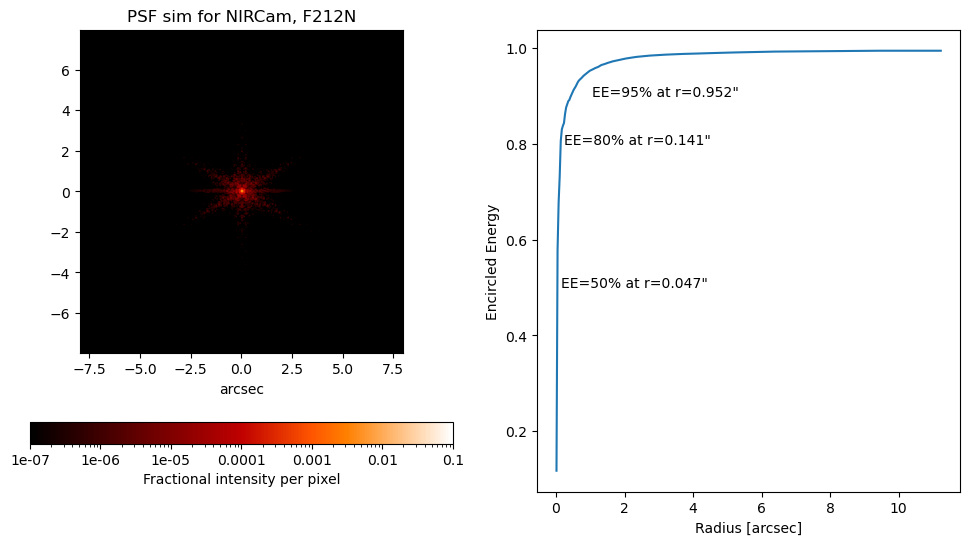

In [14]:
# Show PSF results only for this first OPD
# The EE can be compared to the one listed in the trend_table (0.6717) for testing. 
 
print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [15]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_212 = Ropt
print (Ropt)

0.047201775694671315


In [16]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_212[i], EE_212[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_212[i], EE_212[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06915657686930829 0.5274893602660201
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06914376539320617 0.5278067625862192
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06914554306723755 0.5278727796046603
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06914307941118841 0.5278197391076329
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06914771240863045 0.5278435462578391
Importing and format-conv

In [17]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_212, EE_212)

## F070W analysis

In [18]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F070W'

# Initialize arrays for FWHM and EE values

fwhm_070 = np.zeros(len(file_array))
EE_070 = np.zeros(len(file_array))

In [19]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.02279252518159875 0.6419383736538892
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


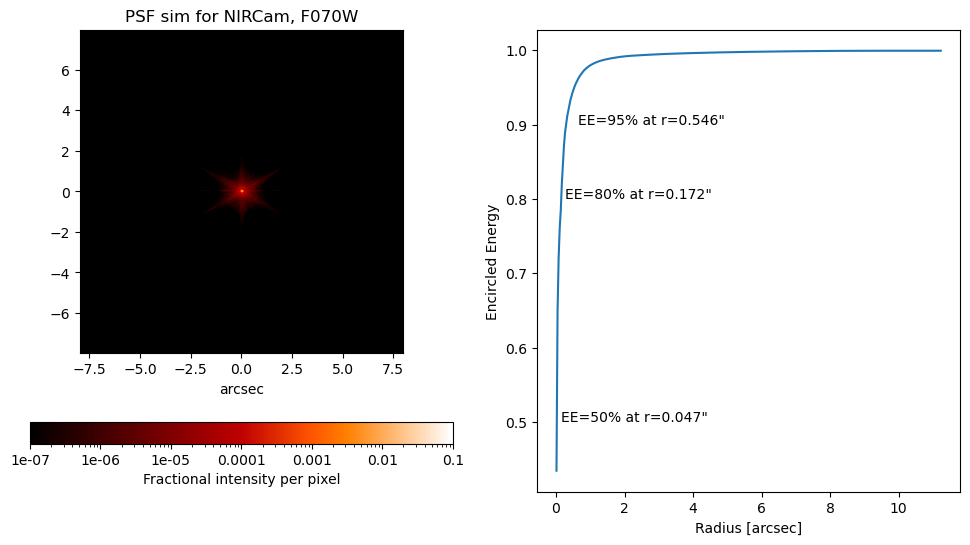

In [20]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [21]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_070 = Ropt
print (Ropt)

0.01742254182782119


In [22]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_070[i], EE_070[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_070[i], EE_070[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.022845226318770083 0.4120198624313481
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.022801141918295777 0.4148346321468238
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.022805302997980993 0.415211137947719
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.022804914126436964 0.4146026295235241
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.02281676004816034 0.41479086775024315
Importing and format-

In [23]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_070, EE_070)

## F090W analysis

In [24]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F090W'

# Initialize arrays for FWHM and EE values

fwhm_090 = np.zeros(len(file_array))
EE_090 = np.zeros(len(file_array))

In [25]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.029451428624575393 0.6310895027517045
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


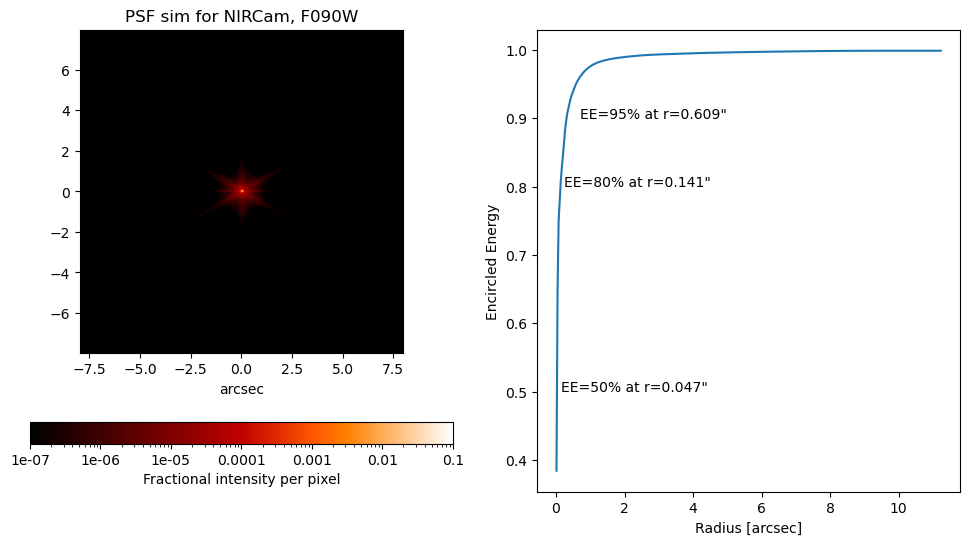

In [26]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [27]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_090 = Ropt
print (Ropt)

0.022033625608343644


In [28]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_090[i], EE_090[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_090[i], EE_090[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.029492416242189394 0.4889659574666143
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.02946437326096299 0.4910074566112971
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.02946999907883525 0.4914183560510577
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.02946653593191097 0.4907635640136156
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.029479139864262496 0.4910871038312899
Importing and format-co

In [29]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_090, EE_090)

## F115W analysis

In [30]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F115W'

# Initialize arrays for FWHM and EE values

fwhm_115 = np.zeros(len(file_array))
EE_115 = np.zeros(len(file_array))

In [31]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.03718515351829068 0.6329480192231296
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


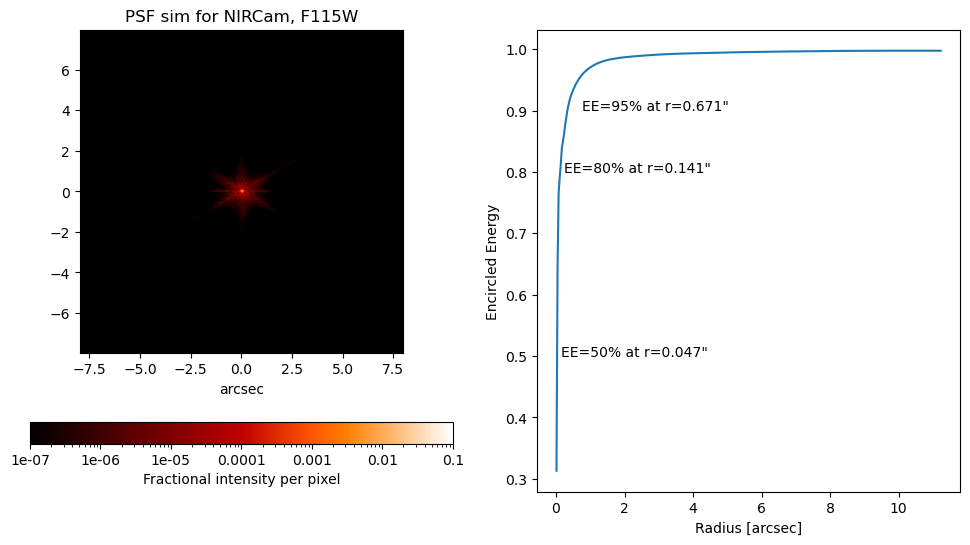

In [32]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [33]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_115 = Ropt
print (Ropt)

0.02724979841561603


In [34]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_115[i], EE_115[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_115[i], EE_115[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.03721229449176037 0.5471735335792773
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.03718170769601774 0.5481245776539823
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.037181364698413974 0.5479906789992101
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.037175371855291565 0.5483604335855345
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.0371829143043718 0.548157937017735
Importing and format-conv

In [35]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_115, EE_115)

## F150W analysis

In [36]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F150W'

# Initialize arrays for FWHM and EE values

fwhm_150 = np.zeros(len(file_array))
EE_150 = np.zeros(len(file_array))

In [37]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.04833295033902534 0.6446266063531774
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


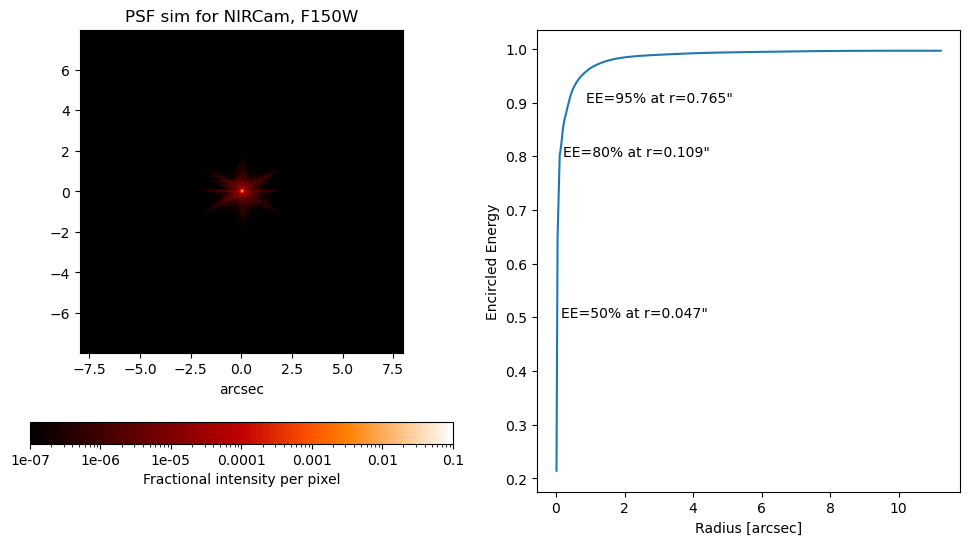

In [38]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [39]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_150 = Ropt
print (Ropt)

0.03450544911927581


In [40]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_150[i], EE_150[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_150[i], EE_150[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.04838385188028334 0.5359735305273192
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.04835686256076926 0.5364125075188156
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.04835693400774141 0.5362696433542914
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.04835286074643032 0.5366458654116599
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.04835693873030405 0.5364405089266181
Importing and format-conv

In [41]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_150, EE_150)

## F200W analysis

In [42]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F200W'

# Initialize arrays for FWHM and EE values

fwhm_200 = np.zeros(len(file_array))
EE_200 = np.zeros(len(file_array))

In [43]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.06353565709485373 0.5889323130894829
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


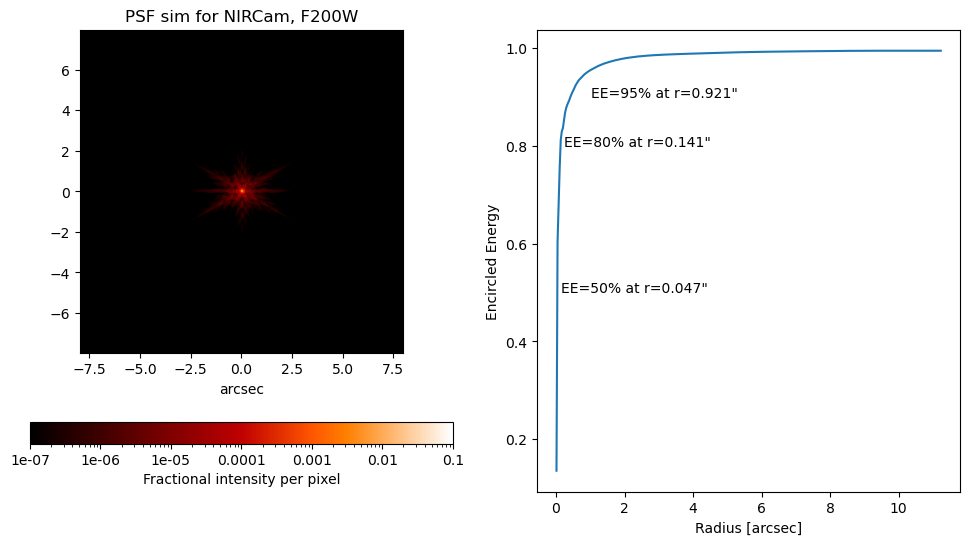

In [44]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [45]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_200 = Ropt
print (Ropt)

0.043899327903525374


In [46]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_200[i], EE_200[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_200[i], EE_200[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06357430320131709 0.528948856829269
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06355900652151611 0.5292725946945844
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06356060619602417 0.5292901911378532
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06355650201864887 0.5293373012861491
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.06356142350567397 0.5293081663371921
Importing and format-conve

In [47]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_200, EE_200)

## F277W analysis

In [48]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F277W'

# Initialize arrays for FWHM and EE values

fwhm_277 = np.zeros(len(file_array))
EE_277 = np.zeros(len(file_array))

In [49]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.08831738723971669 0.46420001408239586
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


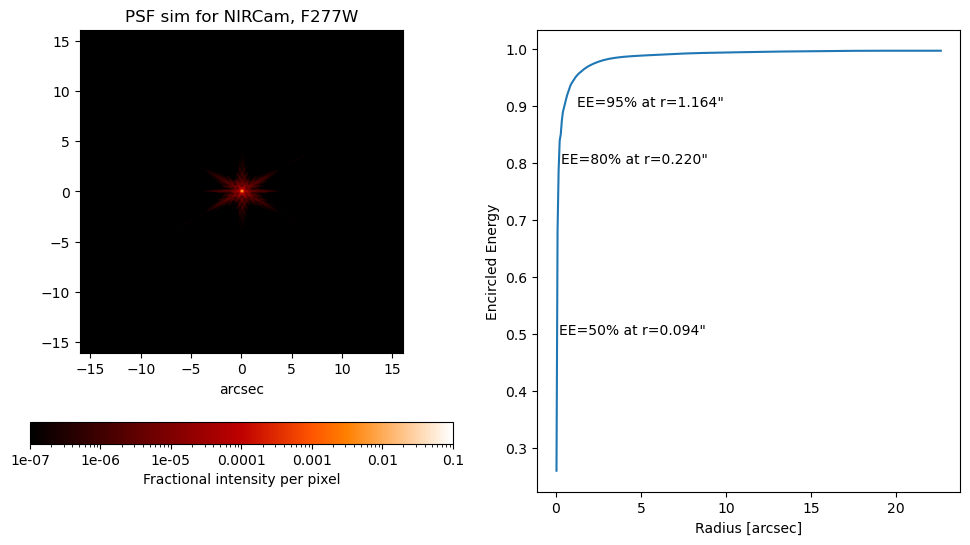

In [50]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [51]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_277 = Ropt
print (Ropt)

0.05797306495875029


In [52]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_277[i], EE_277[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_277[i], EE_277[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.08832499426049052 0.5296661930167185
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.08831966597262429 0.5296188376062486
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.08831884491108337 0.5295465795523564
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.08831031480083795 0.5297447538970208
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.08831012686993865 0.529713854102081
Importing and format-conve

In [53]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_277, EE_277)

## F356W analysis

In [54]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F356W'

# Initialize arrays for FWHM and EE values

fwhm_356 = np.zeros(len(file_array))
EE_356 = np.zeros(len(file_array))

In [55]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.11429686086268903 0.3275707407213807
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


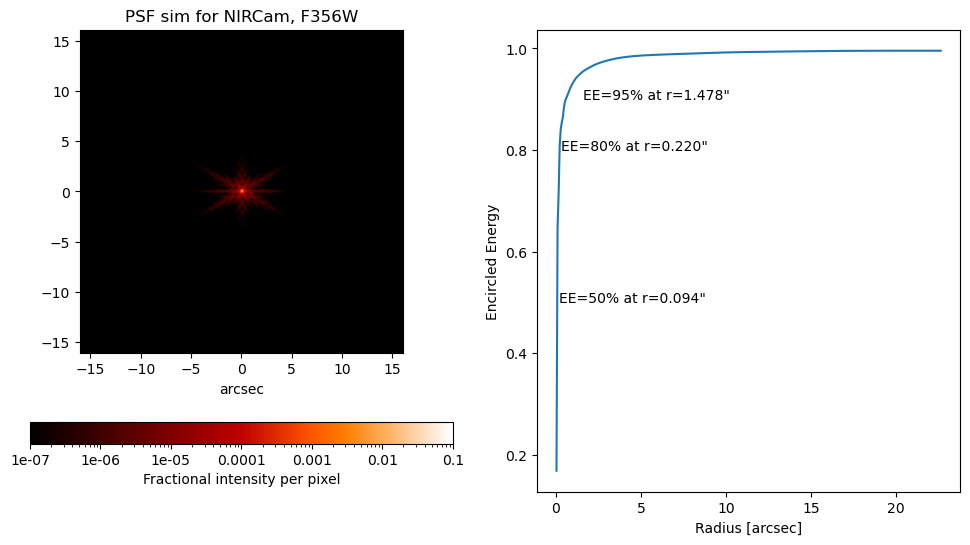

In [56]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [57]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_356 = Ropt
print (Ropt)

0.0710779137717131


In [58]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_356[i], EE_356[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_356[i], EE_356[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.11430257747301201 0.48651933887893395
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.11429622874957926 0.48644843050469994
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.11429455432776818 0.48636623426642867
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.11428675363216624 0.4865614247019829
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.11428602766362839 0.48650221778205593
Importing and format-

In [59]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_356, EE_356)

## F444W analysis

In [60]:
# Set the instrument and filter

nrc = webbpsf.NIRCam()
nrc.filter = 'F444W'

# Initialize arrays for FWHM and EE values

fwhm_444 = np.zeros(len(file_array))
EE_444 = np.zeros(len(file_array))

In [61]:
# Calculate the PSF, the FWHM, and EE within 0.05" for the for the OPD with minimum WFE.

psf, fwhm_value, ee_values = get_EE_rvdm(file_array[imin],0.05)

Importing and format-converting OPD from R2024042102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)


0.14035144152726098 0.23891545960928232
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  OVERSAMP      1 PrimaryHDU     140   (2044, 2044)   float64   
  1  DET_SAMP      1 ImageHDU       142   (511, 511)   float64   
  2  OVERDIST      1 ImageHDU       194   (2044, 2044)   float64   
  3  DET_DIST      1 ImageHDU       195   (511, 511)   float64   


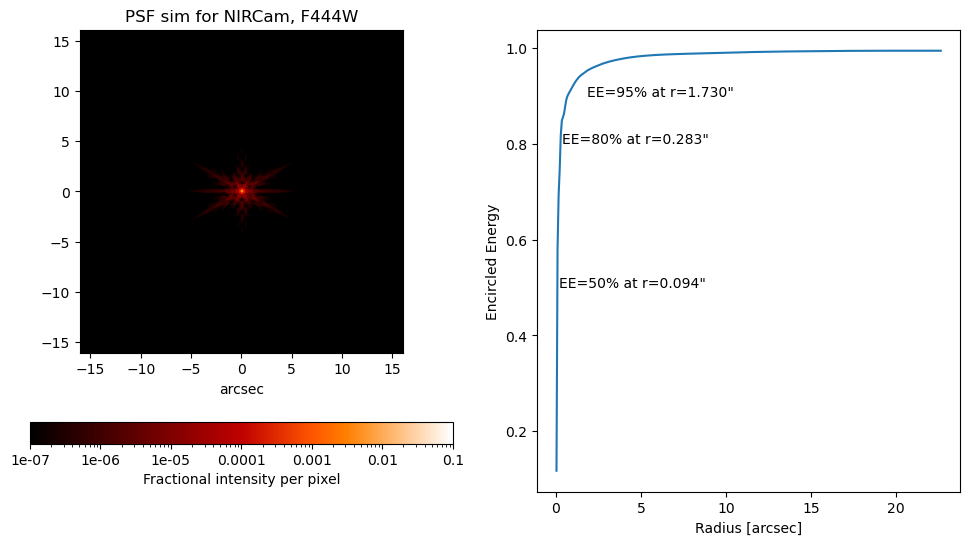

In [62]:
# Show PSF results only for this first OPD

print(fwhm_value, ee_values)

# Get info on the psf object

psf.info()

# Then display the PSF and plot the encircled energy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf, colorbar_orientation='horizontal')
axis2 = plt.subplot(1, 2, 2)
webbpsf.display_ee(psf, ext=1, ax=axis2)

In [63]:
# Calculate the optimal aperture radius based on the fit to the Savino et al. (2024) table

Ropt = 0.0008 + (0.7578 * fwhm_value) - (1.2505 * (fwhm_value**2))
Ropt_444 = Ropt
print (Ropt)

0.08252531420231378


In [64]:
# Now calculate the PSF, the FWHM, and EE within Ropt for all OPDs

for i in range(len(file_array)):
    psf, fwhm_444[i], EE_444[i] = get_EE_rvdm(file_array[i],Ropt)
    print(fwhm_444[i], EE_444[i]) 

Importing and format-converting OPD from R2024033102-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.14032089604396042 0.459965222603872
Importing and format-converting OPD from O2024040501-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.1403453572478365 0.45993918786270416
Importing and format-converting OPD from O2024040701-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.14034554511311817 0.45990812197640485
Importing and format-converting OPD from O2024041001-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.14033912443697882 0.45999301168444623
Importing and format-converting OPD from O2024041101-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
0.1403398455101556 0.459976050969389
Importing and format-conve

In [65]:
# For testing, print the resulting arrays to screen

# print(rmsWFE, fwhm_444, EE_444)

## Plots and Analysis of Trends

In [66]:
# Fit a straight line (degree=1) to the points of EE vs. WFE for each filter.

# The function returns the coefficients of the polynomial,
# where p[0] is the slope (m) and p[1] is the y-intercept (b)

m_070, b_070 = np.polyfit(rmsWFE[0:len(EE_070)],EE_070, 1)
m_090, b_090 = np.polyfit(rmsWFE[0:len(EE_090)],EE_090, 1)
m_115, b_115 = np.polyfit(rmsWFE[0:len(EE_115)],EE_115, 1)
m_150, b_150 = np.polyfit(rmsWFE[0:len(EE_150)],EE_150, 1)
m_200, b_200 = np.polyfit(rmsWFE[0:len(EE_200)],EE_200, 1)
m_277, b_277 = np.polyfit(rmsWFE[0:len(EE_277)],EE_277, 1)
m_356, b_356 = np.polyfit(rmsWFE[0:len(EE_356)],EE_356, 1)
m_444, b_444 = np.polyfit(rmsWFE[0:len(EE_444)],EE_444, 1)

# Generate y-values for the fitted lines

EE_070_fit = (m_070 * rmsWFE[0:len(EE_070)]) + b_070
EE_090_fit = (m_090 * rmsWFE[0:len(EE_090)]) + b_090
EE_115_fit = (m_115 * rmsWFE[0:len(EE_115)]) + b_115
EE_150_fit = (m_150 * rmsWFE[0:len(EE_150)]) + b_150
EE_200_fit = (m_200 * rmsWFE[0:len(EE_200)]) + b_200
EE_277_fit = (m_277 * rmsWFE[0:len(EE_277)]) + b_277
EE_356_fit = (m_356 * rmsWFE[0:len(EE_356)]) + b_356
EE_444_fit = (m_444 * rmsWFE[0:len(EE_444)]) + b_444

# Print the slope divided by the EE for element [imin], which 
# has the lowest value of rmsWFE

print(f"FWHM_0, Ropt, EE_0, s_e/EE_0 for all filters") 
print(f"F070W: {fwhm_070[imin]} , {Ropt_070}, {EE_070[imin]} , {m_070/EE_070[imin]}")
print(f"F090W: {fwhm_090[imin]} , {Ropt_090}, {EE_090[imin]} , {m_090/EE_090[imin]}")
print(f"F115W: {fwhm_115[imin]} , {Ropt_115}, {EE_115[imin]} , {m_115/EE_115[imin]}")
print(f"F150W: {fwhm_150[imin]} , {Ropt_150}, {EE_150[imin]} , {m_150/EE_150[imin]}")
print(f"F200W: {fwhm_200[imin]} , {Ropt_200}, {EE_200[imin]} , {m_200/EE_200[imin]}")
print(f"F277W: {fwhm_277[imin]} , {Ropt_277}, {EE_277[imin]} , {m_277/EE_277[imin]}")
print(f"F356M: {fwhm_356[imin]} , {Ropt_356}, {EE_356[imin]} , {m_356/EE_356[imin]}")
print(f"F444W: {fwhm_444[imin]} , {Ropt_444}, {EE_444[imin]} , {m_444/EE_444[imin]}")

FWHM_0, Ropt, EE_0, s_e/EE_0 for all filters
F070W: 0.02279252518159875 , 0.01742254182782119, 0.42127111386676175 , -0.010843301540142302
F090W: 0.029451428624575393 , 0.022033625608343644, 0.49631833838809625 , -0.006803508239477984
F115W: 0.03718515351829069 , 0.02724979841561603, 0.5497723089026361 , -0.004233142451298877
F150W: 0.04833295033902534 , 0.03450544911927581, 0.5370628660824575 , -0.002493742258123833
F200W: 0.06353565709485373 , 0.043899327903525374, 0.5301423465427262 , -0.0014765260618026701
F277W: 0.08831738723971669 , 0.05797306495875029, 0.5295964765791895 , -0.0005657755203613763
F356M: 0.11429686086268903 , 0.0710779137717131, 0.4862236724690275 , -0.00033048677421924845
F444W: 0.14035144152726098 , 0.08252531420231378, 0.4599003009291639 , -0.00022366799616565188


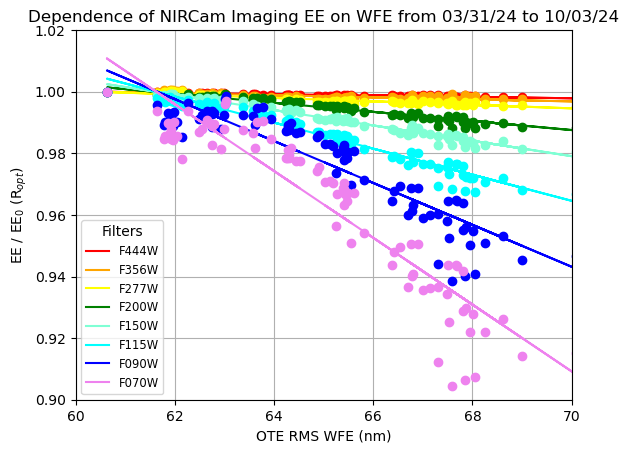

In [67]:
# Create scatter plot of the results
# We divide the EE values and the linear fit by the value for array element 
# number imin, which has the lowest rmsWFE

plt.ylim(0.90,1.02)
plt.xlim(60.0,70.0)

plt.plot(rmsWFE[0:len(EE_444)],EE_444/EE_444[imin],'o',color='red')
plt.plot(rmsWFE[0:len(EE_444)],EE_444_fit/EE_444[imin],color='red',label='F444W')

plt.plot(rmsWFE[0:len(EE_356)],EE_356/EE_356[imin],'o',color='orange')
plt.plot(rmsWFE[0:len(EE_356)],EE_356_fit/EE_356[imin],color='orange',label='F356W')

plt.plot(rmsWFE[0:len(EE_277)],EE_277/EE_277[imin],'o',color='yellow')
plt.plot(rmsWFE[0:len(EE_277)],EE_277_fit/EE_277[imin],color='yellow',label='F277W')

plt.plot(rmsWFE[0:len(EE_200)],EE_200/EE_200[imin],'o',color='green')
plt.plot(rmsWFE[0:len(EE_200)],EE_200_fit/EE_200[imin],color='green',label='F200W')

plt.plot(rmsWFE[0:len(EE_150)],EE_150/EE_150[imin],'o',color='aquamarine')
plt.plot(rmsWFE[0:len(EE_150)],EE_150_fit/EE_150[imin],color='aquamarine',label='F150W')

plt.plot(rmsWFE[0:len(EE_115)],EE_115/EE_115[imin],'o',color='cyan')
plt.plot(rmsWFE[0:len(EE_115)],EE_115_fit/EE_115[imin],color='cyan',label='F115W')

plt.plot(rmsWFE[0:len(EE_090)],EE_090/EE_090[imin],'o',color='blue')
plt.plot(rmsWFE[0:len(EE_090)],EE_090_fit/EE_090[imin],color='blue', label='F090W')

plt.plot(rmsWFE[0:len(EE_070)],EE_070/EE_070[imin],'o',color='violet')
plt.plot(rmsWFE[0:len(EE_070)],EE_070_fit/EE_070[imin],color='violet',label='F070W')

plt.xlabel("OTE RMS WFE (nm)")
plt.ylabel("EE / EE$_{0}$ (R$_{opt}$)")
plt.title("Dependence of NIRCam Imaging EE on WFE from 03/31/24 to 10/03/24")
plt.grid(True)
plt.legend(loc='lower left', title='Filters', fontsize='small', frameon=True, framealpha=0.8)
plt.savefig("NIRCam_EE.jpg",dpi=300) 
plt.show()

## Weighted Averages over different filter Usages

In [68]:
# To calculate weighted averages over the different filters, we
# specify usage fractions

f070 = (1.0/6.0)*(1.0/10.0)
f090 = (1.0/6.0)*(3.0/10.0)
f115 = (1.0/6.0)*(6.0/10.0)
f150 = (1.0/6.0)
f200 = (1.0/6.0)
f277 = (1.0/6.0)
f356 = (1.0/6.0)
f444 = (1.0/6.0)

# Calculate total sums

fstot = ( (f070*m_070/EE_070[imin]) + 
          (f090*m_090/EE_090[imin]) +
          (f115*m_115/EE_115[imin]) +
          (f150*m_150/EE_150[imin]) +
          (f200*m_200/EE_200[imin]) +
          (f277*m_277/EE_277[imin]) +
          (f356*m_356/EE_356[imin]) +
          (f444*m_444/EE_444[imin]) )
ftotNIRC = f070 + f090 + f115 + f150 + f200 + f277 + f356 + f444

seNIRC = fstot/ftotNIRC
print("overall NIRCam -s_e")
print(seNIRC,ftotNIRC)

# Now do separately for the SW and LW channels

fstotSW = ( (f070*m_070/EE_070[imin]) + 
            (f090*m_090/EE_090[imin]) +
            (f115*m_115/EE_115[imin]) +
            (f150*m_150/EE_150[imin]) +
            (f200*m_200/EE_200[imin]) )
ftotSW = f070 + f090 + f115 + f150 + f200

seSW = fstotSW/ftotSW
print("SW NIRCam -s_e")
print(seSW,ftotSW)

fstotLW = ( (f277*m_277/EE_277[imin]) +
            (f356*m_356/EE_356[imin]) +
            (f444*m_444/EE_444[imin]) )
ftotLW = f277 + f356 + f444

seLW = fstotLW/ftotLW
print("LW NIRCam -s_e")
print(seLW,ftotLW)

overall NIRCam -s_e
-0.0017925777845516219 0.9999999999999999
SW NIRCam -s_e
-0.003211845472187818 0.5
LW NIRCam -s_e
-0.0003733100969154255 0.5


In [69]:
# To actually calculate the weighted average with error bars, we do Monte-Carlo simulations

# Set uncertainty factor for all fractions

dffac = 0.5

# Set Gaussian sigma cutoff

sigcut = 1.9

# Set number of Monte Carlos

NMC = 1000000

# Set up arrays with random deviate fractions

dfar_070 = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dfar_090 = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dfar_115 = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dfar_150 = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dfar_200 = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dfar_277 = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dfar_356 = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dfar_444 = np.random.normal(loc=0.0, scale=1.0, size=NMC)

dfar_070 = np.clip(dfar_070, a_min=-1.0*sigcut, a_max=sigcut)
dfar_090 = np.clip(dfar_090, a_min=-1.0*sigcut, a_max=sigcut)
dfar_115 = np.clip(dfar_115, a_min=-1.0*sigcut, a_max=sigcut)
dfar_150 = np.clip(dfar_150, a_min=-1.0*sigcut, a_max=sigcut)
dfar_200 = np.clip(dfar_200, a_min=-1.0*sigcut, a_max=sigcut)
dfar_277 = np.clip(dfar_277, a_min=-1.0*sigcut, a_max=sigcut)
dfar_356 = np.clip(dfar_356, a_min=-1.0*sigcut, a_max=sigcut)
dfar_444 = np.clip(dfar_444, a_min=-1.0*sigcut, a_max=sigcut)

far_070  = (f070 * np.ones(NMC))  + (f070 * dffac * dfar_070)
far_090  = (f090 * np.ones(NMC))  + (f090 * dffac * dfar_090)
far_115  = (f115 * np.ones(NMC))  + (f115 * dffac * dfar_115)
far_150  = (f150 * np.ones(NMC))  + (f150 * dffac * dfar_150)
far_200  = (f200 * np.ones(NMC))  + (f200 * dffac * dfar_200)
far_277  = (f277 * np.ones(NMC))  + (f277 * dffac * dfar_277)
far_356  = (f356 * np.ones(NMC))  + (f356 * dffac * dfar_356)
far_444  = (f444 * np.ones(NMC))  + (f444 * dffac * dfar_444)

# Print some stats for debugging

# print(np.mean(dfar_070),np.min(dfar_070),np.max(dfar_070))

In [70]:
# Calculate weighted sums

# Calculate array of total sums

farstot = ( (far_070*m_070/EE_070[imin]) + 
            (far_090*m_090/EE_090[imin]) +
            (far_115*m_115/EE_115[imin]) +
            (far_150*m_150/EE_150[imin]) +
            (far_200*m_200/EE_200[imin]) +
            (far_277*m_277/EE_277[imin]) +
            (far_356*m_356/EE_356[imin]) +
            (far_444*m_444/EE_444[imin]) )
fartot = far_070 + far_090 + far_115 + far_150 + far_200 + far_277 + far_356 + far_444

# Now do separately for the SW and LW channels

farstotSW = ( (far_070*m_070/EE_070[imin]) + 
              (far_090*m_090/EE_090[imin]) +
              (far_115*m_115/EE_115[imin]) +
              (far_150*m_150/EE_150[imin]) +
              (far_200*m_200/EE_200[imin]) )
fartotSW = far_070 + far_090 + far_115 + far_150 + far_200

farstotLW = ( (far_277*m_277/EE_277[imin]) +
              (far_356*m_356/EE_356[imin]) +
              (far_444*m_444/EE_444[imin]) )
fartotLW = far_277 + far_356 + far_444

# Divide arrays to get weighted average estimated of s_e/EE_0

sar   = farstot/fartot
sarSW = farstotSW/fartotSW
sarLW = farstotLW/fartotLW

# Print statistics

dseNIRC = np.std(sar)
dseSW   = np.std(sarSW)
dseLW   = np.std(sarLW) 

print("Overall NIRCam -s_e (MCs)")
print(np.mean(sar),dseNIRC)
print("SW NIRCam -s_e (MCs)")
print(np.mean(sarSW),dseSW)
print("LW NIRCam -s_e (MCs)")
print(np.mean(sarLW),dseLW)

Overall NIRCam -s_e (MCs)
-0.0018099218107119955 0.0002911085200423022
SW NIRCam -s_e (MCs)
-0.003264281255007268 0.00043569325077064445
LW NIRCam -s_e (MCs)
-0.00037326788412532546 4.3986484569165415e-05


## Weighted Average over all contributing SI modes

In [71]:
# Now we want to use these averages to calculate the weighted average for all the contributing modes,
# as discussed in my TR. 

# Usage percentges of contributing modes (from Cycle 4 usage stats).
# I don't need to include the factor f_app in my TR (fraction of observations that are faint opoint sources),
# since its the same for all modes, and drops out of the average.

fNcamim   = 14.0
fNcamss   =  1.5
fNcamcoro =  2.0
fNissami  =  0.2
fNspecfix =  3.5
fNspecmos = 18.9

# sums

fNsetot = ( (fNcamim*seSW) + (fNcamss*seSW) + (fNcamcoro*seLW/2.0) + (fNissami*seLW) + (fNspecfix*seNIRC/2.0) + (fNspecmos*seNIRC/2.0) )
fNtot   = ( (fNcamim) + (fNcamss) + (fNcamcoro) + (fNissami) + (fNspecfix) + (fNspecmos))

seav = fNsetot / fNtot
print("combined modes -s_e")
print(seav)

combined modes -s_e
-0.001753327883346331


In [72]:
# Now we do Monte-carlo simulations to calculate the error bar

# Set Gaussian sigma cutoff

sigcut = 3.0

# Set number of Monte Carlos

NMC = 1000000

# Set up arrays with random deviates

dsearSW   = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dsearLW   = np.random.normal(loc=0.0, scale=1.0, size=NMC)

dsearSW   = np.clip(dsearSW, a_min=-1.0*sigcut, a_max=sigcut)
dsearLW   = np.clip(dsearLW, a_min=-1.0*sigcut, a_max=sigcut)

searSW     = (seSW   * np.ones(NMC)) + (dseSW   * dsearSW)
searLW     = (seLW   * np.ones(NMC)) + (dseLW   * dsearLW)

# Calculate the overall NIRCam se array from the combination of the SW and LW filters

searNIRC   = ((ftotSW*searSW) + (ftotLW*searLW)) / (ftotSW+ftotLW)

# Now calculate the combination of all the modes

fNsetot = ( (fNcamim*searSW) + (fNcamss*searSW) + (fNcamcoro*searLW/2.0) + 
            (fNissami*searLW) + (fNspecfix*searNIRC/2.0) + (fNspecmos*searNIRC/2.0) )
fNtot   = ( (fNcamim) + (fNcamss) + (fNcamcoro) + (fNissami) + (fNspecfix) + (fNspecmos))

# Get the mean and standard deviation of the Monte-Carlos

dseNIRC = np.std(sar)
dseSW   = np.std(sarSW)
dseLW   = np.std(sarLW)

secomb  = np.mean(fNsetot/fNtot)
dsecomb = np.std(fNsetot/fNtot)

print("combined modes -s_e (MCs)")
print(secomb,dsecomb)

combined modes -s_e (MCs)
-0.0017529415157443238 0.00022872736247864442


## WFC Threshold

In [73]:
# Hardcode results for testing
# secomb  = -0.001753134620044826
# dsecomb = 0.0002283018319913573

# Now we can use this with other numbers to calculate the WFC threshold

# added time for WFC in days

dTc = (1/(24.0*60.0)) * (98.0 - 51.0)

# slope of WFE drift in nm/day

sw  = 0.0862
dsw = 0.0513

# Relevant wall-clock fraction

xi  = 0.2176
dxi = 0.0599

# Calculate threshold in nm

drmsWFE = math.sqrt(dTc*sw/(-2.0*xi*secomb))
print("WFC threshold in nm")
print (drmsWFE)

# Calculate cadence in days
dTWFC = drmsWFE / sw
print("WFC cadence in days")
print (dTWFC)

WFC threshold in nm
1.9204064639814737
WFC cadence in days
22.278497261966052


In [74]:
# Now perform Monte-carlos to generate error bars

# Set Gaussian sigma cutoff

sigcut  = 3.0
sigcutw = 1.0

# Set number of Monte Carlos

NMC = 1000000

# Set up arrays with random deviates

dxiar  = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dxiar  = np.clip(dxiar, a_min=-1.0*sigcut, a_max=sigcut)
xiar   = (xi*np.ones(NMC)) + (dxi*dxiar)

dswar  = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dswar  = np.clip(dswar, a_min=-1.0*sigcutw, a_max=sigcutw)
swar   = (sw*np.ones(NMC)) + (dsw*dswar)

dsear  = np.random.normal(loc=0.0, scale=1.0, size=NMC)
dsear  = np.clip(dsear, a_min=-1.0*sigcut, a_max=sigcut)
sear   = (secomb*np.ones(NMC)) + (dsecomb*dsear)

drmsWFEar = np.sqrt(dTc*swar/(-2.0*xiar*sear))
print("WFC threshold in nm (MCs)")
print (np.mean(drmsWFEar),np.std(drmsWFEar))

dTWFCar = drmsWFEar / swar
print("WFC cadence in days (MCs)")
print (np.mean(dTWFCar),np.std(dTWFCar)) 

WFC threshold in nm (MCs)
1.9502652461675494 0.5826806572604226
WFC cadence in days (MCs)
25.274740052721416 8.078537719721968
